,Age_of_Subject,Time_spent_on_Online_Class,Rating_of_Online_Class_experience,Medium_for_online_class,Time_spent_on_self_study,Time_spent_on_fitness,Time_spent_on_sleep,Time_spent_on_social_media,Prefered_social_media_platform,Number_of_meals_per_day,Change_in_your_weight,Health_issue_during_lockdown,Time_utilized,Family_Relation,Mental_Health
count,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000
mean,20.165821,3.208841,2.845178,1.521997,2.875212,0.765821,7.871235,2.365694,5.483080,2.917936,0.724196,0.136210,0.485618,0.703046,0.608291
std,5.516467,2.101756,1.204236,0.781306,1.995618,0.724451,1.615762,1.767336,1.755398,0.828698,0.744206,0.343156,0.500005,0.457110,0.488339
min,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,7.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20.000000,3.000000,3.000000,1.000000,2.000000,1.000000,8.000000,2.000000,6.000000,3.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,21.000000,5.000000,4.000000,2.000000,4.000000,1.000000,9.000000,3.000000,7.000000,3.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,59.000000,10.000000,5.000000,7.000000,10.000000,5.000000,15.000000,10.000000,13.000000,8.000000,2.000000,1.000000,1.000000,1.000000,1.000000


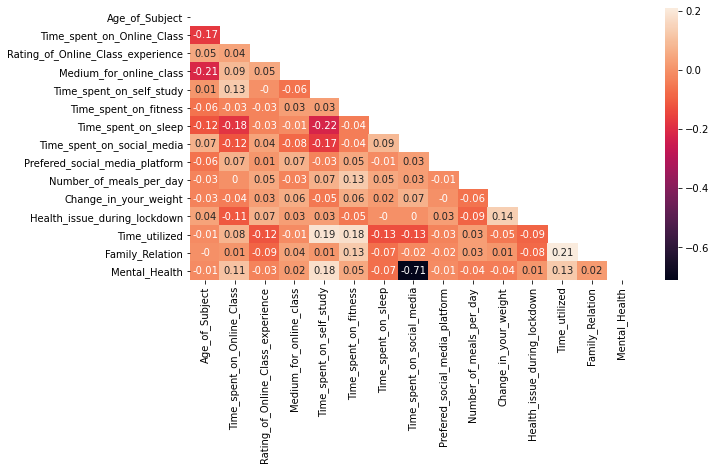

In [21]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn import metrics
from sklearn import utils
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# for reproducibility purposes
seed = 100
# SMOTE number of neighbors
k = 1
df = pd.read_csv("Dataset3.csv")
#df.pop("Mental_Health")
df = df.dropna()
correlation_matrix = df.corr().round(2)
mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (10, 5))
sns.heatmap(data=correlation_matrix, annot=True, mask=mask);
df.describe()

In [2]:
# make a new df made of all the columns, except the target class
X = df[['Time_spent_on_Online_Class', 'Time_spent_on_self_study', 'Time_utilized']]
y = df['Time_spent_on_social_media']
y = y.astype(int)
sm = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=seed)
X_res, y_res = sm.fit_resample(X, y)


df6 = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1)

df6.to_csv('exp_smoted.csv', index=False, encoding='utf-8')

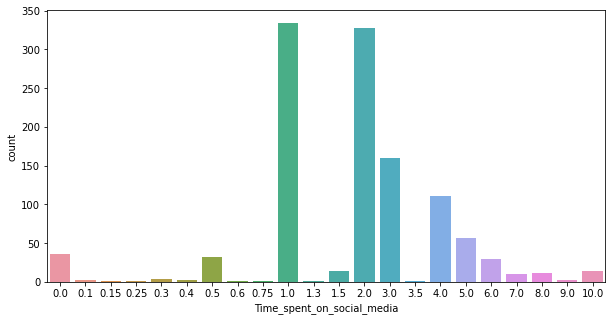

In [3]:
df1 = pd.read_csv("dataset3.csv")
df1 = df1.sample(1150)
plt.figure(figsize = (10, 5))
sns.countplot(df1['Time_spent_on_social_media'])
plt.show()

In [4]:
df2 = pd.read_csv("exp_smoted.csv")
df2 = df2.dropna()
df2["Time_spent_on_social_media"]
df2.Time_spent_on_social_media.value_counts()
df2.describe()

,Time_spent_on_Online_Class,Time_spent_on_self_study,Time_utilized,Time_spent_on_social_media
count,3949.000000,3949.000000,3949.000000,3949.000000
mean,3.087887,2.527482,0.304887,5.000000
std,2.176495,1.794338,0.460418,3.162678
min,0.000000,0.000000,0.000000,0.000000
25%,1.460900,1.102027,0.000000,2.000000
50%,3.000000,2.000000,0.000000,5.000000
75%,4.369835,3.450069,1.000000,8.000000
max,10.000000,10.000000,1.000000,10.000000


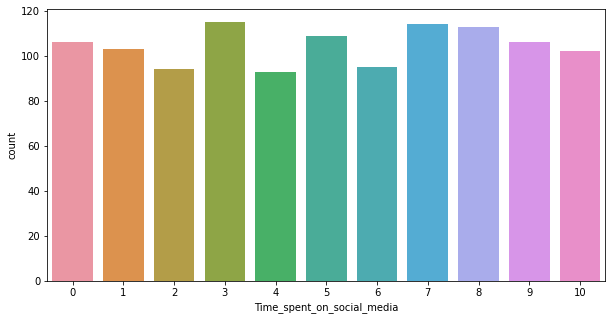

In [5]:
df1 = pd.read_csv("exp_smoted.csv")
df1 = df1.sample(1150)
plt.figure(figsize = (10, 5))
sns.countplot(df1['Time_spent_on_social_media'])
plt.show()

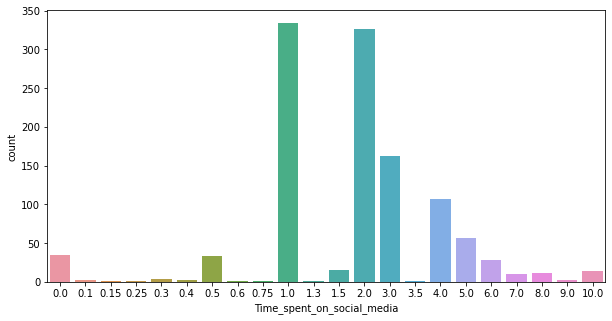

In [6]:
df1 = pd.read_csv("dataset3.csv")
df1 = df1.sample(1150)
plt.figure(figsize = (10, 5))
sns.countplot(df1['Time_spent_on_social_media'])
plt.show()

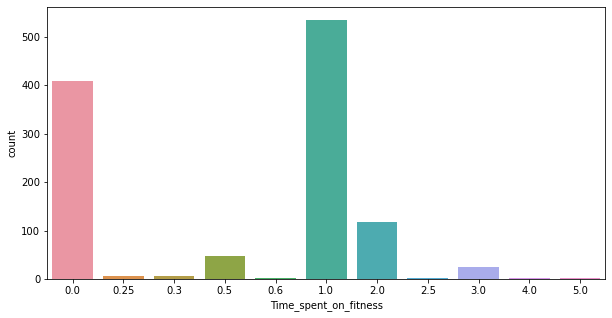

In [7]:
df1 = pd.read_csv("dataset3.csv")
df1 = df1.sample(1150)
plt.figure(figsize = (10, 5))
sns.countplot(df1['Time_spent_on_fitness'])
plt.show()

In [8]:
# make a new df made of all the columns, except the target class
X = df[['Number_of_meals_per_day','Change_in_your_weight','Time_spent_on_Online_Class', 'Time_spent_on_self_study', 'Time_utilized']]
y = df['Time_spent_on_social_media']
y = y.astype(int)
X = X.astype(int)
sm = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=seed)
X_res, y_res = sm.fit_resample(X, y)
df4 = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1)
df4.to_csv('fitness_smoted.csv', index=False, encoding='utf-8')

In [9]:
df.describe()

,Age_of_Subject,Time_spent_on_Online_Class,Rating_of_Online_Class_experience,Medium_for_online_class,Time_spent_on_self_study,Time_spent_on_fitness,Time_spent_on_sleep,Time_spent_on_social_media,Prefered_social_media_platform,Number_of_meals_per_day,Change_in_your_weight,Health_issue_during_lockdown,Time_utilized,Family_Relation,Mental_Health
count,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000
mean,20.165821,3.208841,2.845178,1.521997,2.875212,0.765821,7.871235,2.365694,5.483080,2.917936,0.724196,0.136210,0.485618,0.703046,0.608291
std,5.516467,2.101756,1.204236,0.781306,1.995618,0.724451,1.615762,1.767336,1.755398,0.828698,0.744206,0.343156,0.500005,0.457110,0.488339
min,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,7.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20.000000,3.000000,3.000000,1.000000,2.000000,1.000000,8.000000,2.000000,6.000000,3.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,21.000000,5.000000,4.000000,2.000000,4.000000,1.000000,9.000000,3.000000,7.000000,3.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,59.000000,10.000000,5.000000,7.000000,10.000000,5.000000,15.000000,10.000000,13.000000,8.000000,2.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df.groupby("Time_spent_on_fitness").size()


Time_spent_on_fitness
0.00    419
0.25      6
0.30      5
0.50     53
0.60      2
1.00    550
2.00    119
2.50      1
3.00     25
4.00      1
5.00      1
dtype: int64

In [11]:
df = df[df.Time_spent_on_fitness != 2.50]
df = df[df.Time_spent_on_fitness != 4.00]
df = df[df.Time_spent_on_fitness != 5.00]

In [12]:
df.groupby("Time_spent_on_fitness").size()

Time_spent_on_fitness
0.00    419
0.25      6
0.30      5
0.50     53
0.60      2
1.00    550
2.00    119
3.00     25
dtype: int64

In [13]:
X = df[['Number_of_meals_per_day', 'Time_utilized']]
y = df['Time_spent_on_fitness']
y = y.astype(int)
X = X.astype(int)
sm = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=seed)
X_res, y_res = sm.fit_resample(X, y)
df4 = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1)
df4.to_csv('fitness_smoted.csv', index=False, encoding='utf-8')

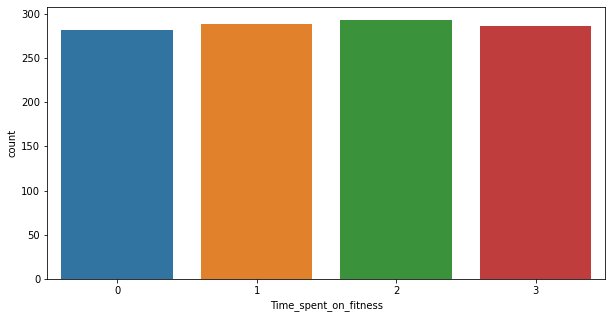

In [14]:
df1 = pd.read_csv("fitness_smoted.csv")
df1 = df1.sample(1150)
plt.figure(figsize = (10, 5))
sns.countplot(df1['Time_spent_on_fitness'])
plt.show()

In [15]:
df.describe()

,Age_of_Subject,Time_spent_on_Online_Class,Rating_of_Online_Class_experience,Medium_for_online_class,Time_spent_on_self_study,Time_spent_on_fitness,Time_spent_on_sleep,Time_spent_on_social_media,Prefered_social_media_platform,Number_of_meals_per_day,Change_in_your_weight,Health_issue_during_lockdown,Time_utilized,Family_Relation,Mental_Health
count,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000
mean,20.167091,3.209372,2.844784,1.519084,2.870653,0.758015,7.872604,2.361111,5.484309,2.914334,0.724343,0.136556,0.485157,0.702290,0.608142
std,5.522456,2.100771,1.205743,0.771038,1.985304,0.706721,1.616890,1.754670,1.754078,0.821169,0.743627,0.343524,0.499992,0.457445,0.488372
min,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,7.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20.000000,3.000000,3.000000,1.000000,2.000000,1.000000,8.000000,2.000000,6.000000,3.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,21.000000,5.000000,4.000000,2.000000,4.000000,1.000000,9.000000,3.000000,7.000000,3.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,59.000000,10.000000,5.000000,7.000000,10.000000,3.000000,15.000000,10.000000,13.000000,8.000000,2.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
X = df[['Age_of_Subject','Time_spent_on_Online_Class','Rating_of_Online_Class_experience','Medium_for_online_class','Time_spent_on_self_study','Time_spent_on_fitness','Time_spent_on_sleep','Prefered_social_media_platform', 'Number_of_meals_per_day','Change_in_your_weight','Health_issue_during_lockdown','Time_utilized','Family_Relation','Mental_Health']]
y = df['Time_spent_on_social_media']
y = y.astype(int)
X = X.astype(int)
sm = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=seed)
X_res, y_res = sm.fit_resample(X, y)
df4 = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1)
df4.to_csv('Final.csv', index=False, encoding='utf-8')

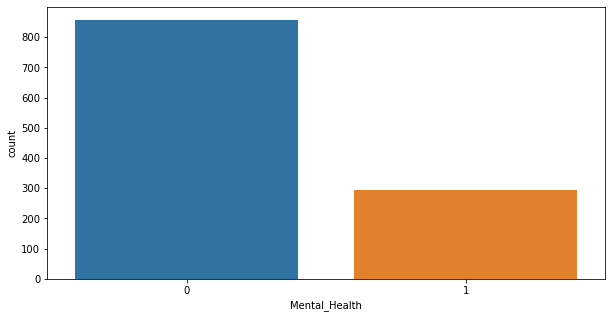

In [58]:
df1 = pd.read_csv("Final.csv")
df1 = df1.sample(1150)
plt.figure(figsize = (10, 5))
sns.countplot(df1['Mental_Health'])
plt.show()

In [73]:
X, y = df1.loc[:,df1.columns!='Mental_Health'], df1['Mental_Health']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (1035, 14)
X_test shape:  (115, 14)
y_train shape:  (1035,)
y_test shape:  (115,)


In [74]:
from sklearn import svm #for Support Vector Machine (SVM) Algorithm
model_svm = svm.SVC() #select the algorithm
model_svm.fit(X_train, y_train) #train the model with the training dataset
y_prediction_svm = model_svm.predict(X_test) # pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_svm = metrics.accuracy_score(y_prediction_svm, y_test).round(4)
print("----------------------------------")
print('The accuracy of the SVM is: {}'.format(score_svm))
print("----------------------------------")
# save the accuracy score
score = set()
score.add(('SVM', score_svm))

----------------------------------
The accuracy of the SVM is: 0.9826
----------------------------------


In [75]:
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
model_dt = DecisionTreeClassifier(random_state=4)
model_dt.fit(X_train, y_train) #train the model with the training dataset
y_prediction_dt = model_dt.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_dt = metrics.accuracy_score(y_prediction_dt, y_test).round(4)
print("---------------------------------")
print('The accuracy of the DT is: {}'.format(score_dt))
print("---------------------------------")
# save the accuracy score
score.add(('DT', score_dt))


---------------------------------
The accuracy of the DT is: 0.9478
---------------------------------


In [76]:
# importing the necessary package to use the classification algorithm
from sklearn.neighbors import KNeighborsClassifier # for K nearest neighbours
#from sklearn.linear_model import LogisticRegression # for Logistic Regression algorithm
model_knn = KNeighborsClassifier(n_neighbors=3) # 3 neighbours for putting the new data into a class
model_knn.fit(X_train, y_train) #train the model with the training dataset
y_prediction_knn = model_knn.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_knn = metrics.accuracy_score(y_prediction_knn, y_test).round(4)
print("----------------------------------")
print('The accuracy of the KNN is: {}'.format(score_knn))
print("----------------------------------")
# save the accuracy score
score.add(('KNN', score_knn))


----------------------------------
The accuracy of the KNN is: 0.9739
----------------------------------


In [77]:
# importing the necessary package to use the classification algorithm
from sklearn.linear_model import LogisticRegression # for Logistic Regression algorithm
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train) #train the model with the training dataset
y_prediction_lr = model_lr.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_lr = metrics.accuracy_score(y_prediction_lr, y_test).round(4)
print("---------------------------------")
print('The accuracy of the LR is: {}'.format(score_lr))
print("---------------------------------")
# save the accuracy score
score.add(('LR', score_lr))


---------------------------------
The accuracy of the LR is: 0.9826
---------------------------------


In [78]:
# importing the necessary package to use the classification algorithm
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train, y_train) #train the model with the training dataset
y_prediction_nb = model_nb.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_nb = metrics.accuracy_score(y_prediction_nb, y_test).round(4)
print("---------------------------------")
print('The accuracy of the NB is: {}'.format(score_nb))
print("---------------------------------")
# save the accuracy score
score.add(('NB', score_nb))

---------------------------------
The accuracy of the NB is: 0.9652
---------------------------------


In [79]:
print("The accuracy scores of different Models:")
print("----------------------------------------")
for s in score:
 print(s)


The accuracy scores of different Models:
----------------------------------------
('NB', 0.9652)
('DT', 0.9478)
('LR', 0.9826)
('KNN', 0.9739)
('SVM', 0.9826)
